# Module: Programming for Data Analysis

# Project 2019

# Lecturer: Brian McGinley

## Introduction
 The Objective of this project is
 
    - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 
    - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
    - Synthesise/simulate a data set as closely matching their properties as possible.
    - Detail research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Real-world phenomenon 

I decide to look at the socioeconomic factors effecting health of people age 18 - 64 in Ireland. The link between general health and socio-economic status is well established.First I have to look at the variables in the dataset. As there are so many factors that effect health but i choose few of them.

I select following factors for creating the dataset. I use the cso.ie website and slan 2007 report to get statistics about the variables.

**Gender:** 
    <br>It is a  categorical variable with values (Male, Female)
    
**Age:**
    <br>It is a non-negative real number between (18 - 64)

**Education:**
    <br>It is a  categorical variable with values ( Third Level, Post Leaving CERT, Higher Secondary, Lower Secondary, Primary or Below)
    
**Employment Status:**
    <br>It is a  categorical variable with values(Employed, Unemployed)
    
**Marital Status:**
    <br>It is a  categorical variable with values( Single, Married, Separated', Divorced, Widowed)
    
**Living Area:**
     <br>It is a  categorical variable with values(Urban, Rural)
     
**Income:**
     <br>It is a  numerical variable.
     
**General Health:**
     <br>It is a  categorical variable with values(Good Health, Bad, Fair)

## Simulate Dataset

### Import Libraries

In [53]:
#import libraries
#Pandas is a software library for data maniupulation & analysis.
import pandas as pd
#Numpy is a python library useful for multi-dimensional arrays & matrices, along with functions to operate on arrays.
import numpy as np
#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set the figure size



<Figure size 720x864 with 0 Axes>

In [2]:
data1 = ['GENDER: Female, Male',
         'AGE: years',
         'EDUCATION:',
         'EMPLOYMENT_STATUS: ',
         'MARITAL_STATUS: ',
         'AREA: ',      
         'INCOME: Income yearly',
         'GENERAL_HEALTH:'
]
short_names = [d.split(':')[0] for d in data1]
#create the dataset
data=pd.DataFrame(columns = short_names)

data

,GENDER,AGE,EDUCATION,EMPLOYMENT_STATUS,MARITAL_STATUS,AREA,INCOME,GENERAL_HEALTH


## GENDER

Gender is a categorical variable, it has two categories male and female. In this dataset the number of males and females are not equal.

numpy.random.choice() is used to generates a random sample from  list gender that has two values ['male','female] .there are many health conditions that vary with gender therefore gender is an important variable.

In [3]:
np.random.seed(256) # Set the random seed
gender=['Male','Female']

data['GENDER']= np.random.choice(gender, 1000)

data['GENDER'].value_counts()

Male      531
Female    469
Name: GENDER, dtype: int64

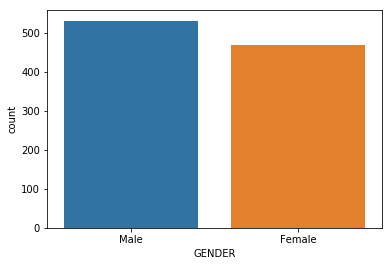

In [4]:
sns.countplot(x=data['GENDER'])

## Age 
Age column data is a numerical data. 
to simulate the data for age column use numpy.random.randint  .

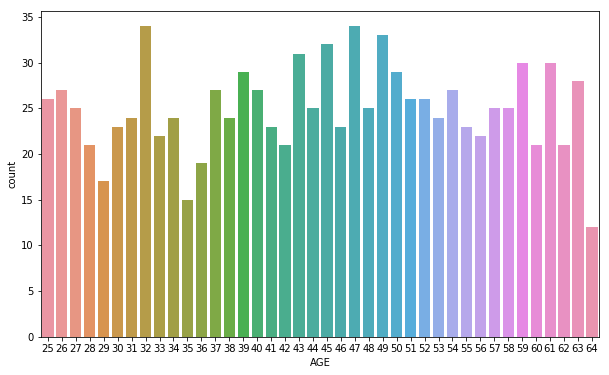

In [60]:
np.random.seed(256) # Set the random seed
data['AGE'] = np.random.randint(25,65, size= 1000,dtype='int')# use np.random.randint to generate number between 25-64 from uniform distribution
fig= plt.figure(figsize=(10,6))
sns.countplot(data['AGE'])

# In first attempt i used the following code as i think of numeric data 
#but than i changed to categories as i found slan statistics better
###data['AGE'] = np.random.randint(25,45, size= 1000,dtype='int')
##age=['18-29','30-44','45-64','65+']
##data['AGE'] = np.random.choice(age, 1000, p=[0.25,0.31,0.29,0.15])
#data = data.astype({"AGE": int})

C:\Users\Admin2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


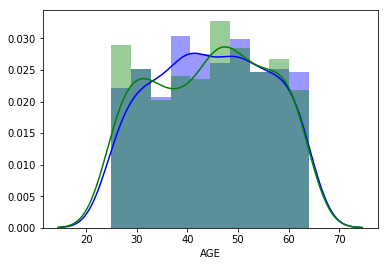

In [6]:
male = data.loc[data.loc[:,'GENDER'] == 'Male']['AGE']
female = data.loc[data.loc[:,'GENDER'] == 'Female']['AGE']

sns.distplot(male, color="b", bins=10, label='Male')
sns.distplot(female, color="g",bins=10, label='Female')
plt.show()


In [7]:
bins = [24, 35, 45, 55, 64]
#cats = pd.cut(data['AGE'], bins)
cats= pd.cut(data['AGE'],bins,right=False)
pd.value_counts(cats)

[45, 55)    279
[24, 35)    243
[35, 45)    241
[55, 64)    225
Name: AGE, dtype: int64

## Education
education is very important indicator of socioeconomics class  and health. As people with higher education are more aware of issue like healthy eating ,healthy lifestyle and mental health.
the data in the column is correspondent to the cso.ie statisics about education
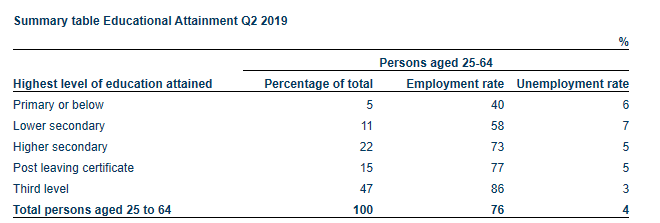


In [8]:
np.random.seed(256)

Edu= ['Third Level','Post Leaving CERT','Higher Secondary','Lower Secondary','Primary or Below']
#source: https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/
data['EDUCATION']= np.random.choice(Edu, 1000, p=[0.47,0.15,0.22,0.11,0.05])
data.head(5)


,GENDER,AGE,EDUCATION,EMPLOYMENT_STATUS,MARITAL_STATUS,AREA,INCOME,GENERAL_HEALTH
0,Male,57,Third Level,NaN,NaN,NaN,NaN,NaN
1,Male,64,Post Leaving CERT,NaN,NaN,NaN,NaN,NaN
2,Female,26,Third Level,NaN,NaN,NaN,NaN,NaN
3,Female,50,Third Level,NaN,NaN,NaN,NaN,NaN
4,Male,63,Third Level,NaN,NaN,NaN,NaN,NaN


## Employment Status
At cso.ie it is stated that the unemployment rate is nearly 6% but I changed it in this sample dataset


In [9]:

np.random.seed(256) # Set the random seed
a=['Employed','Unemployed']
data['EMPLOYMENT_STATUS']= np.random.choice(a, 1000, p=[0.87,0.13])


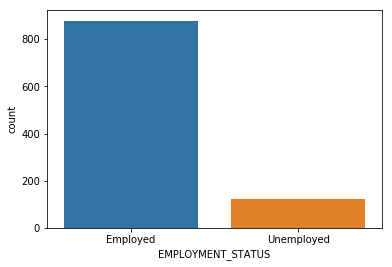

In [10]:
sns.countplot(data['EMPLOYMENT_STATUS'])
#sns.distplot(data. == 'Unemployed')
plt.show()

## Marital Status
Marital status is a categorical data column that has values from list ['Single','Married','Separated','Divorced','Widowed']

The percentage we too from the cso.ie data source

- Single (41.1%) 
- Married (47.7%)
- Separated (3.0%) 
- Divorced (3.0%)
- Widowed (5.2%)

source: https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/ms/

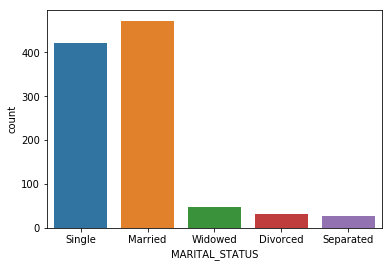

In [11]:
np.random.seed(256) # Set the random seed
ms =['Single','Married','Separated','Divorced','Widowed']
data['MARITAL_STATUS']= np.random.choice(ms, 1000, p=[0.411,0.477,0.03,0.03,0.052])
sns.countplot(data['MARITAL_STATUS'])

## Area 
It is a categorical data column with values {urban,rural}

np.random.choice() is used to get values randomly and cso.ie statistics is used as probability that state 63% people lives in urban area and 37% lives in rural area.

In [12]:
np.random.seed(256)
Area = ['Urban','Rural']
#source:https://www.cso.ie/en/releasesandpublications/ep/p-cp2tc/cp2pdm/
data['AREA']= np.random.choice(Area, 1000, p=[0.63,0.37])
#data

## Income

According to cso.ie statistics 
Income for 
- Primary and Below 18,095
- Lower secondary 22,443
- Higher secondary 25,925
- Post leaving cert 24,627
- Third level non degree 30,068
- Third level degree or above 38,074

source https://www.cso.ie/en/releasesandpublications/ep/p-silc/surveyonincomeandlivingconditionssilc2018/income/

In [13]:


np.random.seed(42)
#'Third Level,','Post Leaving CERT','Higher Secondary', 'Lower Secondry'
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.EDUCATION[idx] == 'Primary or Below':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(18095,20000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
    if data.EDUCATION[idx] == 'Lower Secondary':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(22443,24000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)  
    if data.EDUCATION[idx] == 'Higher Secondary':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(25000,27000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
    if data.EDUCATION[idx] == 'Post Leaving CERT':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(24627,25627)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
    if data.EDUCATION[idx] == 'Third Level':
        if data.EMPLOYMENT_STATUS[idx] =='Employed':
            data.loc[idx, 'INCOME'] = np.random.randint(30065,35000)
        else:
            data.loc[idx, 'INCOME'] = np.random.randint(10000,15000)
        


In [14]:
data.head(5)

,GENDER,AGE,EDUCATION,EMPLOYMENT_STATUS,MARITAL_STATUS,AREA,INCOME,GENERAL_HEALTH
0,Male,57,Third Level,Employed,Single,Urban,30925,NaN
1,Male,64,Post Leaving CERT,Employed,Married,Urban,24897,NaN
2,Female,26,Third Level,Employed,Single,Urban,33837,NaN
3,Female,50,Third Level,Employed,Single,Urban,33157,NaN
4,Male,63,Third Level,Employed,Single,Urban,30531,NaN


## General Health

According to eurostat, people's perception of general health in Ireland is depend upon their income. The median value for gross earned income per person with "very good" health was €27,579 compared to €11,700 per person who described their health as "very bad".

- 84.2% good health
- 3.3%very bad and bad
- 12.5% fair 
source https://ec.europa.eu/eurostat/cache/infographs/qol/index_en.html

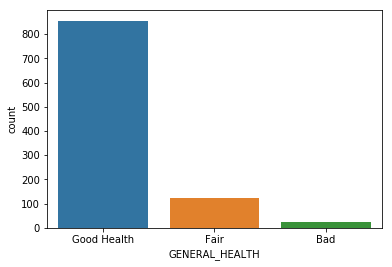

In [15]:
np.random.seed(256) # Set the random seed
gh=['Good Health','Bad','Fair']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.INCOME[idx] > 15000:
           data.loc[idx, 'GENERAL_HEALTH'] = np.random.choice(gh, p=[0.842,0.033,0.125])
    else:
           data.loc[idx,'GENERAL_HEALTH']= np.random.choice(gh, p=[0.30,0.45,0.25])
        
sns.countplot(data['GENERAL_HEALTH'])

In [16]:
data.head(5)
df=pd.DataFrame(data)
df

,GENDER,AGE,EDUCATION,EMPLOYMENT_STATUS,MARITAL_STATUS,AREA,INCOME,GENERAL_HEALTH
0,Male,57,Third Level,Employed,Single,Urban,30925,Good Health
1,Male,64,Post Leaving CERT,Employed,Married,Urban,24897,Good Health
2,Female,26,Third Level,Employed,Single,Urban,33837,Good Health
3,Female,50,Third Level,Employed,Single,Urban,33157,Good Health
4,Male,63,Third Level,Employed,Single,Urban,30531,Good Health
5,Female,48,Third Level,Employed,Single,Urban,34491,Good Health
6,Female,27,Third Level,Employed,Single,Urban,33509,Good Health
7,Male,49,Third Level,Employed,Single,Urban,33236,Good Health
8,Female,32,Higher Secondary,Employed,Married,Rural,25871,Good Health
9,Male,61,Third Level,Employed,Single,Urban,30195,Good Health


# Social Class

The entire population is classified into one of the following social class groups (introduced in 1996) which are defined on the basis of occupation (coded using Soc90):
1. Professional workers
2. Managerial and technical
3. Non-manual
4. Skilled manual
5. Semi-skilled
6. Unskilled
7. All others gainfully occupied and unknown

The occupations included in each of these groups have been selected in such a way as to bring together, as far as possible, people with similar levels of occupational skill.

In determining social class no account is taken of the differences between individuals on the basis of other characteristics such as education. Accordingly social class ranks occupations by the level of skill required on a social class scale ranging from 1 (highest) to 7 (lowest). This scale combines occupations into six groups by occupation and employment status following procedures similar to those outlined above for the allocation of socio-economic group. A residual category “All others gainfully occupied and unknown” is used where no precise allocation is possible.
source:https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/bgn/

For dataset we are using 4 categories these
SC 1-2 (Upper) 31.4% 
SC 3-4 (Middle) 37.6%
SC 5-6 (Lower) 16.1% 
Unclassified 14.9%

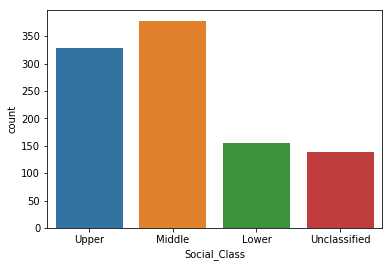

In [17]:
np.random.seed(256) # Set the random seed
a=['Upper','Middle','Lower','Unclassified']
data['Social_Class']= np.random.choice(a, 1000, p=[0.314,0.376,0.161,0.149])
sns.countplot(data['Social_Class'])

In [18]:
data.head(5)

,GENDER,AGE,EDUCATION,EMPLOYMENT_STATUS,MARITAL_STATUS,AREA,INCOME,GENERAL_HEALTH,Social_Class
0,Male,57,Third Level,Employed,Single,Urban,30925,Good Health,Upper
1,Male,64,Post Leaving CERT,Employed,Married,Urban,24897,Good Health,Middle
2,Female,26,Third Level,Employed,Single,Urban,33837,Good Health,Upper
3,Female,50,Third Level,Employed,Single,Urban,33157,Good Health,Upper
4,Male,63,Third Level,Employed,Single,Urban,30531,Good Health,Upper


There is significant divide in earnings from county to county.but The Central Statistics Office (CSO) numbers show that the average income for Irish households stood at €45,256 in 2016.

The Dublin coastal town of Malahide had the highest average income of €78,631 of all 41 towns in the country with a population of 10,000 or over.

Celbridge in Co Kildare had the second highest at €64,877 while Maynooth was third at €64,529. The towns with the lowest average incomes were Longford at €29,224, Enniscorthy, Co Wexford, at €31,049 and Ballina, Co Mayo, with €32,779.

Dublin City had the highest earned income per person at €39,999, followed by Dún Laoghaire-Rathdown, €37,117, and Cork City, €34,317.

The lowest earned incomes per person by county were in Donegal at €24,626, Monaghan at €24,903 and Leitrim at €25,962. The figures showed that 42.3pc of households had two or more people earning an income, while 30.1pc had just one member earning a wage.

An average of 27% of households throughout the country had no income earners at all. Social welfare payments to people of working age made up more than half of the income in 13.7pc of households. while the State pension formed the majority of income in 12.9 %. This gave a total of 26.6pc of households where social welfare made up more than half of household income in Ireland in 2016.Households where the occupants were in the medical, finance, legal and IT professions enjoyed the highest incomes, while farmers, care workers and home carers earned under €30,000. gender The data also showed a significant gender gap in some professions. In the financial managers and directors' sector, female income was €60,126 compared with €94,500 for males. 

In contrast, the primary and nursery teaching professions had the smallest gender gaps.The CSO revealed that those who travel farthest to work also earn the most. The average worker driving less than 30 minutes to work earns €32,004 a year,
 compared with €41,495 for those travelling more than 30 minutes.Those who described their health as "very bad" earned an average of €11,700, but those who earned more than €27,579 reported their health as "very good".
 
#source: https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html


**NOTE: 
As I was thinking that it will be easy to generate this dataset but it was so wide that I feel it is not enough and as i didn't complete the statistics module yet therefore understanding the probability distributions was a challenge.In research i found that there are so many factors involved in health and well being but most of it a categorical data and very wide. Only one thing was for definite the people who earn more are healthier than people who earn less.**

**As I was interested in health related data set and in my research i come across a dataset about Adolescent Sleep. It was not that wide and i decide to work on that. I could not find the exact data but I got the statistics so decide to build it.**

# Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour
This research  was about Adolesents sleep and its association with social media ,mental health and problem behaviour. I have the statistics of this data to generate the dataset

Dataset statistics available at (Source): https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

In [21]:
#create a DataFrame
s_data=pd.DataFrame()

## Age 
This column has age value of kids from 13 -18 with 17 as mean. I used np.random.randint() to create an sample of 2028 numbers range from 13-18

C:\Users\Admin2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


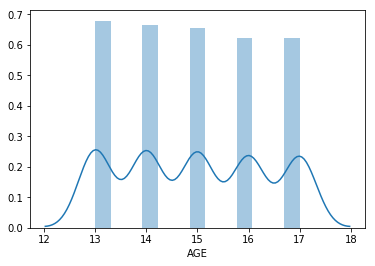

In [61]:
#Age 13-18 15mean
np.random.seed(256) # Set the random seed
s_data['AGE'] = np.random.randint(13,18, size= 2028,dtype='int')

#sns.distplot(s_data['AGE'])
sns.distplot(s_data['AGE'])
plt.show()

## Gender

This data was base on a survey and the respondents are 51.1% females and 48.9% males. so use np.random.choice with given probabilities.

In [23]:
#Gender male= 48.9 female= 51.1
np.random.seed(256) # Set the random seed
gender=['Male','Female']
s_data['GENDER']= np.random.choice(gender, 2028,p=[0.489,0.511])

s_data['GENDER'].value_counts()

Female    1031
Male       997
Name: GENDER, dtype: int64

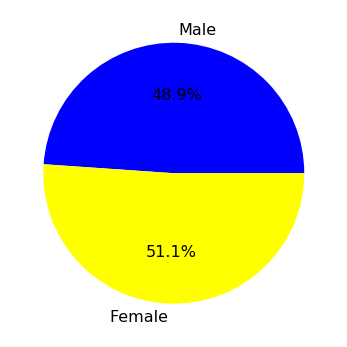

In [62]:
# Pie Plot of gender
fig= plt.figure(figsize=(6,6))# set the plot size
plt.pie([0.489, 0.511], labels=['Male', 'Female'], colors=['blue','yellow'],
autopct='%1.1f%%', textprops={'fontsize': 16})
plt.show()


## Social media use
To measure the time spent on social media participants were asked the following question “How much time on average do you spend on the following: Being on social media on the internet for example on Facebook, Twitter, Instagram, Vine, Tumblr,
WhatsApp, Snapchat, Skype” the response to the question ranged from 1 (almost no time) to 8 (6 hours or more). When processing the date a change was made and the responses were combined into three groups; those that answered Almost no time, thirty minutes to an hour and around one hour, were combined and called Little time. Those who answered around two hours and around three hours were combined and called Average time and finally those that answered, around four hours, around five hours and six hours or more were combined and called Long time. This was done on the basis of a study by Mediakix (2017) stating that the
average person spends around 116 minutes a day on social media. (Source): https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf

It is a categorical data and numpy.random.choice is used to draw the samples

In [25]:
# these are the statistics in the dataset,Little time 55.5% (1,077) ,Average time 30.4% (589), Long time 14.1% 
np.random.seed(256) # Set the random seed
smedia=['Little Time','Average Time','Long Time']
s_data['MEDIA']= np.random.choice(smedia, 2028,p=[0.555,0.304,0.141])

s_data['MEDIA'].value_counts()
# Plot of media use


Little Time     1123
Average Time     623
Long Time        282
Name: MEDIA, dtype: int64

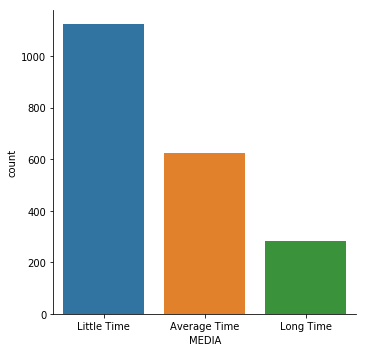

In [26]:
sns.catplot(x="MEDIA", kind="count" ,data=s_data);
plt.show()

## Sleep
To measure participant’s sleep they were asked the following question: “How many hours on average do you normally sleep at night?” And the following answers were available: 9 hours or more, around 9 hours, around 8 hours, around 7 hours, around 6 hours,6 hours or less. When processing the data a change was made and the six categories were combined into two groups, Sufficient sleep and Insufficient sleep. This was done according to official sleep recommendations for this age group (14-17 years old) which states that seven to eleven hours of sleep is appropriate but anything below is not (Hirshkowitz et al., 2015).

In [27]:
# sufficient sleep 86.5 Insufficient sleep 13.5. The Sufficient sleep
np.random.seed(256) # Set the random seed

sleep=['Sufficient_sleep','Insufficient_sleep']
cnt = 0
for idx, val in enumerate(s_data.itertuples()):
    if s_data.MEDIA[idx] == 'Long Time':
            s_data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.75,0.25])
        
    if s_data.MEDIA[idx] == 'Average Time':
            s_data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.75,0.25])
        
    if s_data.MEDIA[idx] == 'Little Time':
            s_data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.865,0.135])
        
#data['SLEEP']= np.random.choice(sleep, 2028,p=[0.865,0.135])

s_data['SLEEP'].value_counts()

Sufficient_sleep      1524
Insufficient_sleep     504
Name: SLEEP, dtype: int64

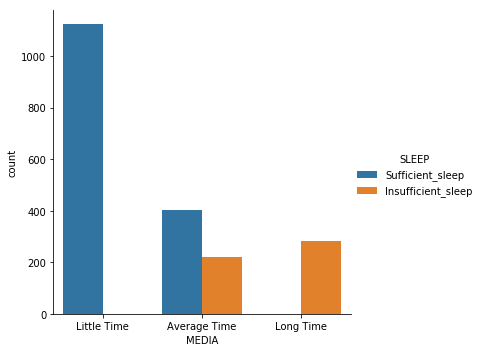

In [28]:
sns.catplot(x="MEDIA", hue="SLEEP",kind="count" ,data=s_data);
plt.show()

In [29]:
s_data.groupby(['SLEEP','MEDIA']).count()

AGE  GENDER
SLEEP              MEDIA                     
Insufficient_sleep Average Time   222     222
                   Long Time      282     282
Sufficient_sleep   Average Time   401     401
                   Little Time   1123    1123

## Mental Health
To measure mental wellbeing participants were asked the following question “How good is your mental health?” and the responses were measured on a 4 point Likert scale, range from 1 (very good) to 4 (bad). as this study is about sleep therefore on the base of sleep we are putting the values in

In [30]:
# Very good 44.1% (876),Good 37.9% (754),Alright 12.5% (248),Bad 5.5% 
#np.random.seed(256) # Set the random seed
mhealth=['Very good','Good','Alright','Bad']
cnt = 0
for idx, val in enumerate(s_data.itertuples()):
    if s_data.SLEEP[idx] == 'Sufficient_sleep':
            s_data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.441,0.379,0.125,0.055])
        
    if s_data.SLEEP[idx] == 'Insufficient_sleep':
            s_data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.305,0.32,0.125,0.25])
                           

#data['MENTAL_HEALTH']= np.random.choice(mhealth, 2028,p=[0.441,0.379,0.125,0.055])

s_data['MENTAL_HEALTH'].value_counts()
#s=np.random.lognormal(2.5,1,2000)
#print(s)

Very good    828
Good         729
Alright      259
Bad          212
Name: MENTAL_HEALTH, dtype: int64

In [31]:
s_data.groupby(['SLEEP','MENTAL_HEALTH']).count()

AGE  GENDER  MEDIA
SLEEP              MENTAL_HEALTH                    
Insufficient_sleep Alright         68      68     68
                   Bad            121     121    121
                   Good           171     171    171
                   Very good      144     144    144
Sufficient_sleep   Alright        191     191    191
                   Bad             91      91     91
                   Good           558     558    558
                   Very good      684     684    684

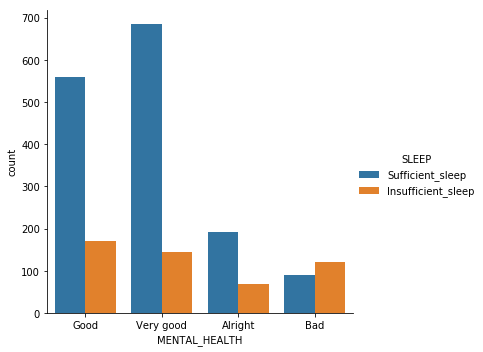

In [32]:
sns.catplot(x='MENTAL_HEALTH', hue="SLEEP",kind="count" ,data=s_data);
plt.show()

## Problem Behaviour
Few questions were combined to measure problem behaviour that all involved inappropriate actions such as showing aggression by fighting and skipping school. The following questions were asked: “How often in the last 12 months, did the following of these six statement happen”: break rules at home, broke rules at school, got into a fight, skipped school, fled from home, and got in to trouble for lying and stealing. Answerswere collected using Likert scale which ranges from 1 (rare/almost never) to 4 (almost always or always). After combining all answers the range reach from 0-24 and the variable was named behaviour. The variable was split into three groups, First group ranged from 0-6 was named Low, the second group ranged from 7-12 and got the name Medium and third group range was from 13-24 and got named High. 

In [33]:
#Low 51.6% (1,022),Medium 45.4% (900),High 3.0% (59)

#np.random.seed(256) # Set the random seed
behaviour=['Low','Medium','High']
cnt = 0
for idx, val in enumerate(s_data.itertuples()):
    if s_data.SLEEP[idx] == 'Sufficient_sleep':
            s_data.loc[idx, 'BEHAVIOUR_PROBLEM'] = np.random.choice(behaviour,p=[0.52,0.46,0.02])
        
    if s_data.SLEEP[idx] == 'Insufficient_sleep':
            s_data.loc[idx, 'BEHAVIOUR_PROBLEM'] = np.random.choice(behaviour,p=[0.41,0.39,0.20])
        
   #data['BEHAVIOUR']= np.random.choice(behaviour, 2028,p=[0.516,0.454,0.03])

s_data['BEHAVIOUR_PROBLEM'].value_counts()


Low       966
Medium    937
High      125
Name: BEHAVIOUR_PROBLEM, dtype: int64

In [34]:
s_data.groupby(['SLEEP','BEHAVIOUR_PROBLEM']).count()

AGE  GENDER  MEDIA  MENTAL_HEALTH
SLEEP              BEHAVIOUR_PROBLEM                                   
Insufficient_sleep High                91      91     91             91
                   Low                202     202    202            202
                   Medium             211     211    211            211
Sufficient_sleep   High                34      34     34             34
                   Low                764     764    764            764
                   Medium             726     726    726            726

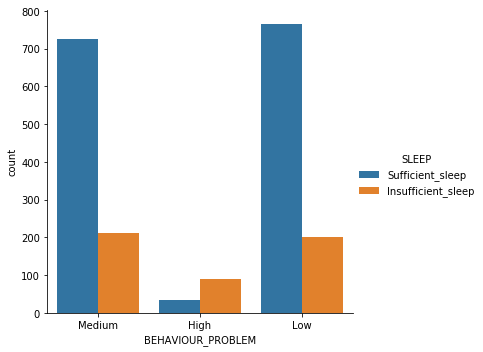

In [35]:
sns.catplot(x="BEHAVIOUR_PROBLEM", hue="SLEEP",kind="count" ,data=s_data);
plt.show()

In [36]:
s_data

,AGE,GENDER,MEDIA,SLEEP,MENTAL_HEALTH,BEHAVIOUR_PROBLEM
0,13,Male,Little Time,Sufficient_sleep,Good,Medium
1,15,Female,Average Time,Sufficient_sleep,Good,High
2,14,Male,Little Time,Sufficient_sleep,Good,Medium
3,13,Male,Little Time,Sufficient_sleep,Very good,Medium
4,14,Male,Little Time,Sufficient_sleep,Very good,Medium
5,17,Male,Little Time,Sufficient_sleep,Good,Low
6,16,Male,Little Time,Sufficient_sleep,Alright,Medium
7,15,Male,Little Time,Sufficient_sleep,Very good,Medium
8,15,Female,Average Time,Insufficient_sleep,Good,Low
9,13,Male,Little Time,Sufficient_sleep,Alright,High


## Relation between Behaviour and Sleep


In [37]:
#source: https://codingdisciple.com/chi-squared-python.html
contingency_table = pd.crosstab(
    s_data['BEHAVIOUR_PROBLEM'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
BEHAVIOUR_PROBLEM,,,
High,91,34,125
Low,202,764,966
Medium,211,726,937
All,504,1524,2028


In [38]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values,])
f_obs

array([[ 91,  34],
       [202, 764],
       [211, 726]], dtype=int64)

In [39]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(164.64145040606343, 1.7724063530209756e-36, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'BEHAVIOUR_PROBLEM' and the 'SLEEP' column.

## Relation between Gender and Sleep

In [40]:
s_data.groupby(['GENDER','SLEEP']).count()

AGE  MEDIA  MENTAL_HEALTH  BEHAVIOUR_PROBLEM
GENDER SLEEP                                                           
Female Insufficient_sleep  504    504            504                504
       Sufficient_sleep    527    527            527                527
Male   Sufficient_sleep    997    997            997                997

In [41]:
contingency_table = pd.crosstab(
    s_data['GENDER'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
GENDER,,,
Female,504,527,1031
Male,0,997,997
All,504,1524,2028


In [42]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

array([[504, 527],
       [  0, 997]], dtype=int64)

In [43]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(645.9448880721258, 1.702245989538457e-142, 1)

source:Statistical Analysis 5: Chi-squared (2) test for 2-way tables 

## Relation between Mental Health and Sleep

In [44]:
contingency_table = pd.crosstab(
    s_data['MENTAL_HEALTH'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
MENTAL_HEALTH,,,
Alright,68,191,259
Bad,121,91,212
Good,171,558,729
Very good,144,684,828
All,504,1524,2028


In [45]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values])
f_obs

array([[ 68, 191],
       [121,  91],
       [171, 558]], dtype=int64)

In [46]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(90.5986367576664, 2.1220518641300727e-20, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'MENTAL_HEALTH' and the 'SLEEP' column. 

## Relation between media and sleep

In [47]:
contingency_table = pd.crosstab(
    s_data['MEDIA'],
    s_data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
MEDIA,,,
Average Time,222,401,623
Little Time,0,1123,1123
Long Time,282,0,282
All,504,1524,2028


In [48]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values])
f_obs

array([[ 222,  401],
       [   0, 1123],
       [ 282,    0]], dtype=int64)

In [49]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(1262.8797465726093, 5.876887511931266e-275, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'MEDIA' and the 'SLEEP' column.

SOURCE: https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence 

In [50]:
#Contingency Table
contingency_table=pd.crosstab(s_data["SLEEP"],s_data["GENDER"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 GENDER              Female  Male
SLEEP                           
Insufficient_sleep     504     0
Sufficient_sleep       527   997


In [51]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[504   0]
 [527 997]]


In [85]:
#dummy encoding
#hot encoding
# As we have all categorical data so i decide to  use get dummies
dumy= s_data.drop(columns=['AGE','GENDER'])
dumy=pd.get_dummies(dumy)
##dumy=dumy.drop(['AGE'])
cor=dumy.corr()
dumy.corr()

,MEDIA_Average Time,MEDIA_Little Time,MEDIA_Long Time,SLEEP_Insufficient_sleep,SLEEP_Sufficient_sleep,MENTAL_HEALTH_Alright,MENTAL_HEALTH_Bad,MENTAL_HEALTH_Good,MENTAL_HEALTH_Very good,BEHAVIOUR_PROBLEM_High,BEHAVIOUR_PROBLEM_Low,BEHAVIOUR_PROBLEM_Medium
MEDIA_Average Time,1.000000,-0.741774,-0.267614,0.166136,-0.166136,0.011001,0.020520,0.015708,-0.035579,0.042667,-0.040136,0.019626
MEDIA_Little Time,-0.741774,1.000000,-0.447680,-0.640602,0.640602,-0.013138,-0.143932,-0.003477,0.101909,-0.182382,0.057756,0.030120
MEDIA_Long Time,-0.267614,-0.447680,1.000000,0.698843,-0.698843,0.004207,0.179428,-0.015948,-0.098976,0.205141,-0.029463,-0.069441
SLEEP_Insufficient_sleep,0.166136,-0.640602,0.698843,1.000000,-1.000000,0.012420,0.254766,-0.024187,-0.143406,0.284358,-0.086977,-0.050039
SLEEP_Sufficient_sleep,-0.166136,0.640602,-0.698843,-1.000000,1.000000,-0.012420,-0.254766,0.024187,0.143406,-0.284358,0.086977,0.050039
MENTAL_HEALTH_Alright,0.011001,-0.013138,0.004207,0.012420,-0.012420,1.000000,-0.130736,-0.286646,-0.317841,0.006364,-0.018842,0.015806
MENTAL_HEALTH_Bad,0.020520,-0.143932,0.179428,0.254766,-0.254766,-0.130736,1.000000,-0.255958,-0.283814,0.086669,-0.041893,0.000159
MENTAL_HEALTH_Good,0.015708,-0.003477,-0.015948,-0.024187,0.024187,-0.286646,-0.255958,1.000000,-0.622277,-0.038172,0.007725,0.010675
MENTAL_HEALTH_Very good,-0.035579,0.101909,-0.098976,-0.143406,0.143406,-0.317841,-0.283814,-0.622277,1.000000,-0.021005,0.031331,-0.021254
BEHAVIOUR_PROBLEM_High,0.042667,-0.182382,0.205141,0.284358,-0.284358,0.006364,0.086669,-0.038172,-0.021005,1.000000,-0.244434,-0.237516


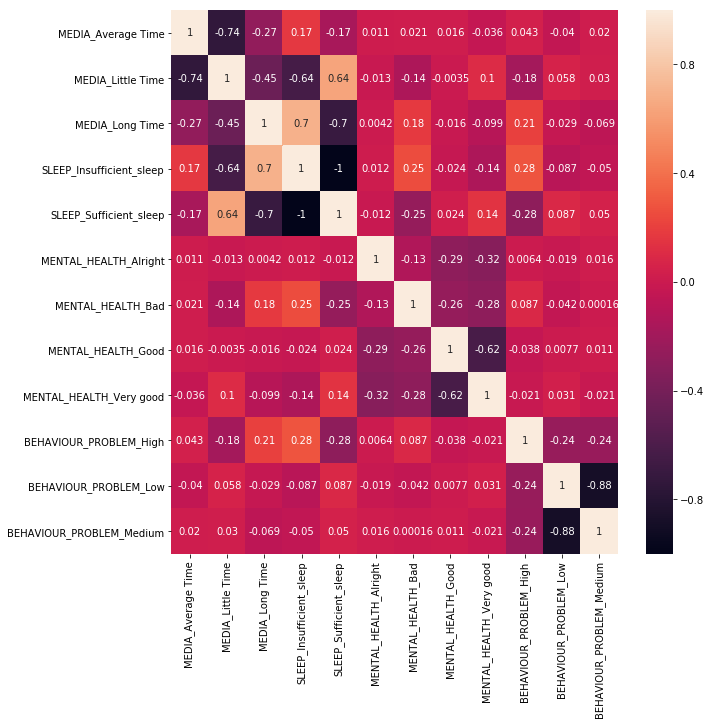

In [86]:
fig= plt.figure(figsize=(10,10))# set the plot size
sns.heatmap(cor,annot=True)

# Conclusion
It was a very challenging task for me as I understand the probability distribution use for data sampling. but can't find a topic where i can use other than uniform or normal distribution. I watched so many resources available online other than class tutorials. I tried to look at different dataset that are available online. This project enhance my understanding of data simulation aspect of data science. Lack of my knowledge about statistics and probability distributions was a setback for me. But during the course of this project I learned more about the importance of statistics in data Analysis.

# Reference
1. https://www.cso.ie/en/releasesandpublications/ep/p-eaads/earningsanalysisusingadministrativedatasources2018/
2. Education Attainment Report 2019 online available at https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2019/ accessed on 04/12/2019
3. Great divide in household income across the country is laid bare online available at  https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html accessed on 05/12/2019
4. iterate over pandas rows and set column values based on values in other column available online at
https://stackoverflow.com/questions/55114954/iterate-over-pandas-rows-and-set-column-values-based-on-values-in-other-column accessed on 06/12/2019
5. Barry, M.M., Van Lente, E., Molcho. M., Morgan, K., McGee, H., Conroy, R.M., Watson, D., Shelley, E. and Perry, I. (2009) SLÁN 2007: Survey of Lifestyle, Attitudes and Nutrition in Ireland. Mental Health and Social Well-being Report, Department of Health and Children. Dublin: The Stationery Office.
6. Practical Tutorial on Data Manipulation with Numpy and Pandas in Python available at  https://www.hackerearth.com/practice/machine-learning/data-manipulation-visualisation-r-python/tutorial-data-manipulation-numpy-pandas-python/tutorial/ accessed on 11/12/2019
7. A Gentle Introduction to Calculating Normal Summary Statistics available online at https://machinelearningmastery.com/a-gentle-introduction-to-calculating-normal-summary-statistics/ accessed on 13/12/2019


8. Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour availabe online at
https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf accessed on 9/12/2019
9. Find the relationship between two categorical variables available at https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence accessed on  9/12/2019
10. Using Python to Find Correlation Between Categorical and Continuous Variables  available at https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1 accessed on 11/12/2019
11. Chi-Squared Test for Independence in Python available at https://codingdisciple.com/chi-squared-python.html accessed on 11/12/2019
12. Statistical Analysis 5: Chi-squared (2) test for 2-way tables available online at http://www.statstutor.ac.uk/resources/uploaded/coventrychisquared.pdf accessed on 13/12/2019
